In [1]:
import warnings
warnings.filterwarnings('ignore')

import h5py

from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
#from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import keras

from keras.models import Sequential
from keras.optimizers import SGD
from keras import regularizers
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Reshape, Dense, Flatten, Dropout,MaxPooling2D, BatchNormalization

C:\Users\rames\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
f = h5py.File("SVHN_single_grey1.h5",mode='r')

In [4]:
list(f)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [5]:
f['X_test'].shape

(18000, 32, 32)

In [6]:
f['X_train'].shape

(42000, 32, 32)

In [7]:
f['X_val'].shape

(60000, 32, 32)

In [8]:
len(f['X_train'])

42000

In [10]:
x_train = f['X_train'][:]
x_test = f['X_test'][:]
x_val = f['X_val'][:]

y_train = f['y_train'][:]
y_test = f['y_test'][:]
y_val = f['y_val'][:]

In [26]:
print("x_train shape: ",x_train.shape ," y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape ," y_test shape: ",y_test.shape)
print("x_val shape: ",x_val.shape ," y_val shape: ",y_val.shape)

x_train shape:  (42000, 32, 32)  y_train shape:  (42000,)
x_test shape:  (18000, 32, 32)  y_test shape:  (18000,)
x_val shape:  (60000, 32, 32)  y_val shape:  (60000,)


In [11]:
x_train_reshape = np.reshape(x_train,(42000,1024))
x_test_reshape = np.reshape(x_test,(18000,1024))
x_val_reshape = np.reshape(x_val,(60000,1024))

In [28]:
print("x_train shape after reshape: ",x_train_reshape.shape)
print("x_test shape after reshape: ",x_test_reshape.shape)
print("x_val shape after reshape: ",x_val_reshape.shape)

x_train shape after reshape:  (42000, 1024)
x_test shape after reshape:  (18000, 1024)
x_val shape after reshape:  (60000, 1024)


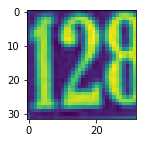

In [13]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])

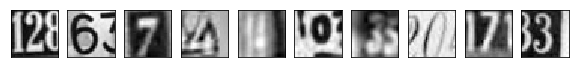

In [14]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    ##plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')#cmap=plt.cm.binary)
    ##plt.xlabel(trainY[i])
plt.show()

In [90]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 20, 2)
accuracies = []

# loop over kVals
for k in range(1, 20, 2):
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_reshape, y_train)

    # evaluate the model and print the accuracies list
    score = model.score(x_test_reshape, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=45.92%
k=3, accuracy=46.18%
k=5, accuracy=49.02%
k=7, accuracy=50.71%
k=9, accuracy=51.24%
k=11, accuracy=51.80%
k=13, accuracy=52.11%
k=15, accuracy=52.36%
k=17, accuracy=52.87%
k=19, accuracy=52.72%


In [91]:
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(x_train_reshape, y_train)
predictions = model.predict(x_test_reshape)
#print(predictions[1])

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_test,predictions))

k=17 achieved highest accuracy of 52.87% on validation data
EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.45      0.70      0.55      1814
          1       0.46      0.73      0.56      1828
          2       0.62      0.55      0.59      1803
          3       0.45      0.43      0.44      1719
          4       0.67      0.65      0.66      1812
          5       0.51      0.39      0.44      1768
          6       0.50      0.41      0.45      1832
          7       0.71      0.62      0.67      1808
          8       0.47      0.36      0.41      1812
          9       0.55      0.43      0.48      1804

avg / total       0.54      0.53      0.52     18000

Confusion matrix
[[1274   66   34   35   46   45   98   39   78   99]
 [  99 1335   55   95   69   36   31   46   26   36]
 [  94  226 1000   95   44   37   35  141   52   79]
 [ 129  260  135  736   47  160   36   57   94   65]
 [ 105  249   41   60 1177   16   54   19   4

In [15]:
train_Y = tf.keras.utils.to_categorical(y_train, num_classes=10)
test_Y = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [16]:
X_train = x_train / 255
X_test = x_test / 255

In [17]:
print(X_train.shape)

(42000, 32, 32)


In [30]:
model = Sequential()
model.add(Reshape((1024,),input_shape=(32,32,)))
model.add(Dense(units=250,activation="relu"))
model.add(Dense(units=100,activation="relu"))

model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model_history = model.fit(X_train, train_Y, 
          validation_data=(X_test, test_Y), 
          epochs=30)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 7s 159us/step - loss: 2.2573 - acc: 0.1829 - val_loss: 2.1737 - val_acc: 0.2741
Epoch 2/30
42000/42000 [==============================] - 6s 145us/step - loss: 2.0152 - acc: 0.3571 - val_loss: 1.8679 - val_acc: 0.3809
Epoch 3/30
42000/42000 [==============================] - 5s 129us/step - loss: 1.6729 - acc: 0.4783 - val_loss: 1.4932 - val_acc: 0.5618
Epoch 4/30
42000/42000 [==============================] - 5s 121us/step - loss: 1.4315 - acc: 0.5625 - val_loss: 1.4190 - val_acc: 0.5579
Epoch 5/30
42000/42000 [==============================] - 5s 117us/step - loss: 1.2724 - acc: 0.6113 - val_loss: 1.2666 - val_acc: 0.6131
Epoch 6/30
42000/42000 [==============================] - 5s 127us/step - loss: 1.1718 - acc: 0.6413 - val_loss: 1.1775 - val_acc: 0.6274
Epoch 7/30
42000/42000 [==============================] - 5s 124us/step - loss: 1.0984 - acc: 0.6628 - val_loss: 1.5243 - 

In [32]:
accuracy = model.evaluate(x=X_test,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1]*100)

18000/18000 [==============================] - 2s 100us/step
Accuracy:  74.7722221919232


In [21]:
model = Sequential()
model.add(Reshape((1024,),input_shape=(32,32,)))
model.add(Dense(units=250,activation="relu"))
model.add(Dense(units=100,activation="relu"))

model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model_history = model.fit(X_train, train_Y, 
          validation_data=(X_test, test_Y), 
          epochs=30)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 10s 237us/step - loss: 2.3060 - acc: 0.1001 - val_loss: 2.3027 - val_acc: 0.0982
Epoch 2/30
42000/42000 [==============================] - 9s 206us/step - loss: 2.3028 - acc: 0.1006 - val_loss: 2.3027 - val_acc: 0.1008
Epoch 3/30
42000/42000 [==============================] - 9s 207us/step - loss: 2.3031 - acc: 0.1000 - val_loss: 2.3029 - val_acc: 0.0955
Epoch 4/30
42000/42000 [==============================] - 8s 200us/step - loss: 2.3027 - acc: 0.0993 - val_loss: 2.3029 - val_acc: 0.0955
Epoch 5/30
42000/42000 [==============================] - 9s 207us/step - loss: 2.3028 - acc: 0.0995 - val_loss: 2.3028 - val_acc: 0.0955
Epoch 6/30
42000/42000 [==============================] - 8s 199us/step - loss: 2.3028 - acc: 0.0989 - val_loss: 2.3027 - val_acc: 0.0955
Epoch 7/30
42000/42000 [==============================] - 9s 213us/step - loss: 2.3027 - acc: 0.0983 - val_loss: 2.3028 -

In [23]:
accuracy = model.evaluate(x=X_test,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1]*100)

18000/18000 [==============================] - 2s 115us/step
Accuracy:  9.550000184526047


In [21]:
model = Sequential()
model.add(Reshape((1024,),input_shape=(32,32,)))
model.add(Dense(units=500,activation="relu"))
model.add(Dense(units=250,activation="relu"))
#Dropout layer
model.add(Dropout(0.25))
model.add(Dense(units=150,activation="relu"))
model.add(Dense(units=100,activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model_history = model.fit(X_train, train_Y, 
          validation_data=(X_test, test_Y), 
          epochs=30)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 15s 349us/step - loss: 2.2972 - acc: 0.1211 - val_loss: 2.2693 - val_acc: 0.1976
Epoch 2/30
42000/42000 [==============================] - 15s 349us/step - loss: 2.2141 - acc: 0.2025 - val_loss: 2.0329 - val_acc: 0.3521
Epoch 3/30
42000/42000 [==============================] - 14s 344us/step - loss: 1.8681 - acc: 0.3461 - val_loss: 1.5953 - val_acc: 0.4929
Epoch 4/30
42000/42000 [==============================] - 14s 345us/step - loss: 1.5790 - acc: 0.4631 - val_loss: 1.3939 - val_acc: 0.5382
Epoch 5/30
42000/42000 [==============================] - 14s 343us/step - loss: 1.3940 - acc: 0.5402 - val_loss: 1.2341 - val_acc: 0.6105
Epoch 6/30
42000/42000 [==============================] - 14s 339us/step - loss: 1.2837 - acc: 0.5878 - val_loss: 1.2265 - val_acc: 0.6034
Epoch 7/30
42000/42000 [==============================] - 15s 363us/step - loss: 1.2011 - acc: 0.6165 - val_loss: 1.

In [23]:
accuracy = model.evaluate(x=X_test,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1]*100)

18000/18000 [==============================] - 4s 211us/step
Accuracy:  78.05555535852909


In [18]:
model = Sequential()
model.add(Reshape((1024,),input_shape=(32,32,)))
model.add(Dense(units=500,activation="relu"))
model.add(Dense(units=250,activation="relu"))
#Dropout layer
model.add(Dropout(0.25))
model.add(Dense(units=150,activation="relu"))
model.add(Dense(units=100,activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model_history = model.fit(X_train, train_Y, 
          validation_data=(X_test, test_Y), 
          epochs=30)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 24s 570us/step - loss: 2.3065 - acc: 0.0994 - val_loss: 2.3029 - val_acc: 0.0955
Epoch 2/30
42000/42000 [==============================] - 23s 553us/step - loss: 2.3028 - acc: 0.1004 - val_loss: 2.3027 - val_acc: 0.1007
Epoch 3/30
42000/42000 [==============================] - 23s 544us/step - loss: 2.3028 - acc: 0.1005 - val_loss: 2.3029 - val_acc: 0.0982
Epoch 4/30
42000/42000 [==============================] - 23s 555us/step - loss: 2.3028 - acc: 0.1006 - val_loss: 2.3028 - val_acc: 0.0955
Epoch 5/30
42000/42000 [==============================] - 23s 556us/step - loss: 2.3028 - acc: 0.1011 - val_loss: 2.3028 - val_acc: 0.0955
Epoch 6/30
42000/42000 [==============================] - 23s 552us/step - loss: 2.3028 - acc: 0.0997 - val_loss: 2.3028 - val_acc: 0.0955
Epoch 7/30
42000/42000 [==============================] - 23s 543us/step - loss: 2.3027 - acc: 0.1019 - val_loss: 2.

In [20]:
accuracy = model.evaluate(x=X_test,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1]*100)

18000/18000 [==============================] - 4s 233us/step
Accuracy:  10.022222411301401


In [24]:
model = Sequential()
model.add(Reshape((1024,),input_shape=(32,32,)))

model.add(BatchNormalization())

model.add(Dense(units=500,activation="relu"))
model.add(Dense(units=250,activation="relu"))
#Dropout layer
model.add(Dropout(0.25))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=100,activation="relu"))
#model.add(Dropout(0.5))

model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model_history = model.fit(X_train, train_Y, 
          validation_data=(X_test, test_Y), 
          epochs=30)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 17s 414us/step - loss: 1.9232 - acc: 0.3250 - val_loss: 1.2550 - val_acc: 0.6197
Epoch 2/30
42000/42000 [==============================] - 18s 421us/step - loss: 1.2369 - acc: 0.5978 - val_loss: 0.9817 - val_acc: 0.6972
Epoch 3/30
42000/42000 [==============================] - 17s 402us/step - loss: 1.0261 - acc: 0.6748 - val_loss: 0.8756 - val_acc: 0.7249
Epoch 4/30
42000/42000 [==============================] - 17s 405us/step - loss: 0.9154 - acc: 0.7099 - val_loss: 0.7852 - val_acc: 0.7646
Epoch 5/30
42000/42000 [==============================] - 17s 407us/step - loss: 0.8321 - acc: 0.7371 - val_loss: 0.7160 - val_acc: 0.7852
Epoch 6/30
42000/42000 [==============================] - 17s 407us/step - loss: 0.7799 - acc: 0.7526 - val_loss: 0.6732 - val_acc: 0.8018
Epoch 7/30
42000/42000 [==============================] - 18s 421us/step - loss: 0.7372 - acc: 0.7665 - val_loss: 0.

In [26]:
accuracy = model.evaluate(x=X_test,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1]*100)

18000/18000 [==============================] - 4s 224us/step
Accuracy:  84.92222169703908


In [29]:
model = Sequential()
model.add(Reshape((1024,),input_shape=(32,32,)))

model.add(BatchNormalization())

model.add(Dense(units=500,activation="relu"))
model.add(Dense(units=250,activation="relu"))
#Dropout layer
model.add(Dropout(0.25))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=100,activation="relu"))
#model.add(Dropout(0.5))

model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model_history = model.fit(X_train, train_Y, 
          validation_data=(X_test, test_Y), 
          epochs=30)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 37s 879us/step - loss: 1.5343 - acc: 0.4806 - val_loss: 1.0115 - val_acc: 0.6869
Epoch 2/30
42000/42000 [==============================] - 34s 820us/step - loss: 1.0958 - acc: 0.6510 - val_loss: 0.9631 - val_acc: 0.7065
Epoch 3/30
42000/42000 [==============================] - 34s 808us/step - loss: 0.9642 - acc: 0.6946 - val_loss: 0.7539 - val_acc: 0.7775
Epoch 4/30
42000/42000 [==============================] - 34s 809us/step - loss: 0.8680 - acc: 0.7277 - val_loss: 0.7163 - val_acc: 0.7869
Epoch 5/30
42000/42000 [==============================] - 34s 801us/step - loss: 0.8092 - acc: 0.7489 - val_loss: 0.6717 - val_acc: 0.8011
Epoch 6/30
42000/42000 [==============================] - 34s 814us/step - loss: 0.7561 - acc: 0.7632 - val_loss: 0.6587 - val_acc: 0.8037
Epoch 7/30
42000/42000 [==============================] - 34s 813us/step - loss: 0.7216 - acc: 0.7731 - val_loss: 0.

In [31]:
accuracy = model.evaluate(x=X_test,y=test_Y,batch_size=10)
print("Accuracy: ", accuracy[1]*100)

18000/18000 [==============================] - 6s 312us/step
Accuracy:  86.29444383415911


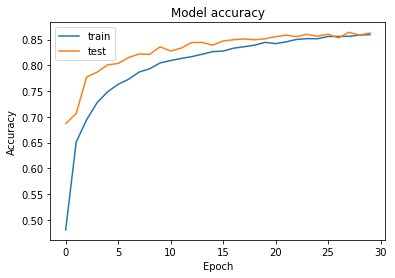

In [32]:
# Model Accuracy 
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

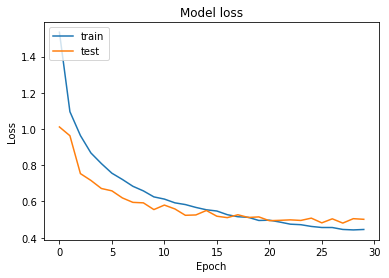

In [33]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()